In [9]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

#handle miising values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

#pandas to numpy
names = df.columns.drop('mpg').drop('name')
x=df[names].values
y=df['mpg'].values #regression

#split into train and test
x_train, x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.25,random_state=45)

In [16]:
#simple function to evaluate the coefficients of a regression
%matplotlib inline
from IPython.display import display,HTML

def report_coef(names,coef,intercept):
    r=pd.DataFrame({"coef": coef, "positive": coef>=0}, index=names)
    r=r.sort_values(by=['coef'])
    display(r)
    print("Intercept:{}".format(intercept))
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

## linear regression

RMSE is 3.0019345985860766


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept:-19.101231042200112


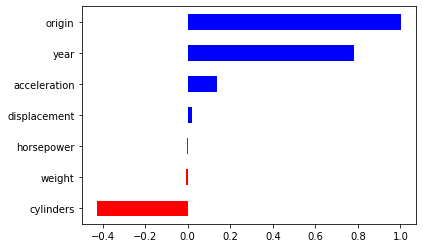

In [17]:
import sklearn

#create linear regression
regressor = sklearn.linear_model.LinearRegression()

#fit / train linear regression
regressor.fit(x_train,y_train)

pred=regressor.predict(x_test)

score=np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f'RMSE is {score}')

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

## Lasso regularization-l1

#### if you have to many input features you can use this to see which one are more "efficient" to calculate output than others some may have not much significant influence to use them

RMSE is 3.060402190403332


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept:-18.506677982383223


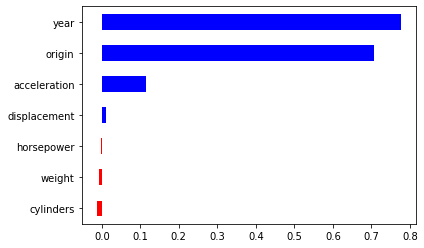

In [28]:
#lasso will push many weight connections near 0, when weight is near 0 
#program drops it from nn and making it more sparse
# it is ading error to minimalize E=a*sum(|w|)
import sklearn
from sklearn.linear_model import Lasso

#create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

#alphas is showing more or less features. it has influence on

#fit regression
regressor.fit(x_train,y_train)
#predict regression
pred=regressor.predict(x_test)

#measure RMSE
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f'RMSE is {score}')
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

## as you see 4 of 7 values is nearly 0 and RMSE is at smilar lvl

(1e-08, 100000000.0)

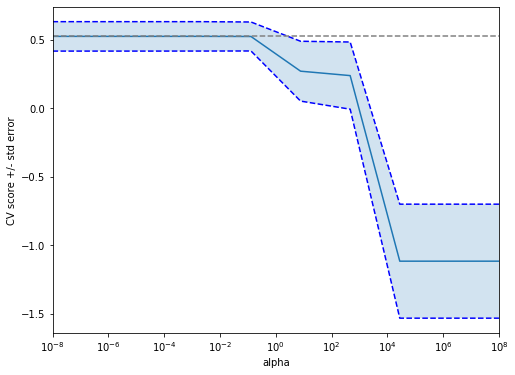

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

## Ridge regression-l2

Final score (RMSE): 3.0036496535815043


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


Intercept:-19.079800744254904


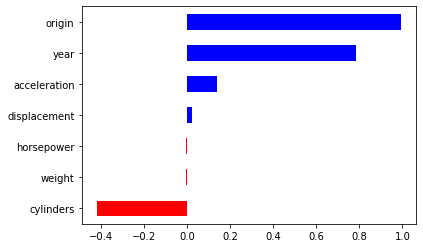

In [39]:

# it is ading error to minimalize E=a*sum(w^2)
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f'Final score (RMSE): {score}'')

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

## ElasticNet regularization combines both upper method
### a*l1+b*l2

Final score (RMSE): 3.055203661458238


,coef,positive
cylinders,-0.085993,False
weight,-0.007317,False
horsepower,-0.002941,False
displacement,0.012856,True
acceleration,0.118101,True
origin,0.728653,True
year,0.777302,True


Intercept:-18.437657131565963


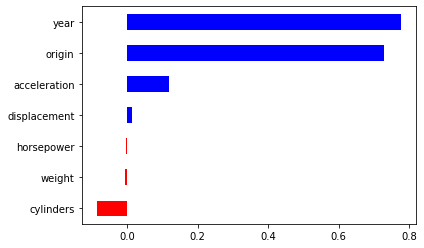

In [42]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)